In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

sns.set(style="ticks", color_codes=True)


ibm_data = pd.read_csv("HR_IBM.csv")
xyz_data = pd.read_csv("organization.csv")

fields_trim_ibm = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']

ibm_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,6210.000000,6210.000000,6210.000000,6210.000000,6210.0,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,...,6210.000000,6210.0,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000
mean,34.283575,757.338164,9.897585,2.605636,1.0,1020.317069,2.258454,64.539130,2.319324,1.645733,...,2.346377,80.0,0.404992,8.776490,2.408213,2.419807,5.186957,2.891626,1.709823,2.836554
std,8.500013,353.687719,7.250603,0.925229,0.0,540.216030,0.987291,17.279755,0.723685,0.926047,...,0.985966,0.0,0.683002,7.008011,1.081342,0.728209,5.536187,2.916845,2.690184,2.931249
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,469.000000,4.000000,2.000000,1.0,565.000000,1.000000,51.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,33.000000,733.000000,8.000000,3.000000,1.0,1017.000000,2.000000,64.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,7.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000
75%,40.000000,1032.000000,15.000000,3.000000,1.0,1460.000000,3.000000,78.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,11.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
#Remove useless columns
ibm_df = copy.deepcopy(ibm_data)

for col in fields_trim_ibm:
    ibm_df = ibm_df.drop(col, 1)

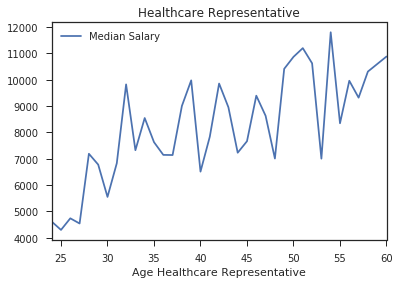

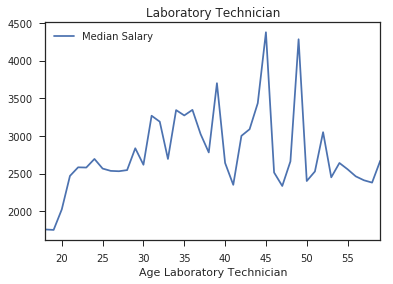

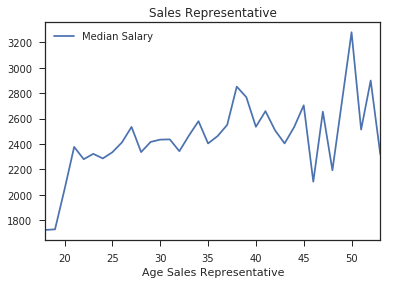

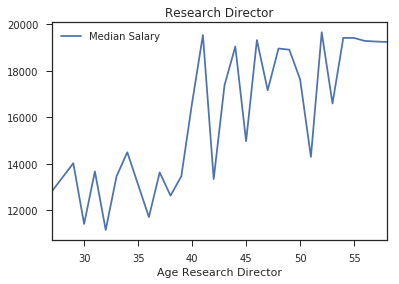

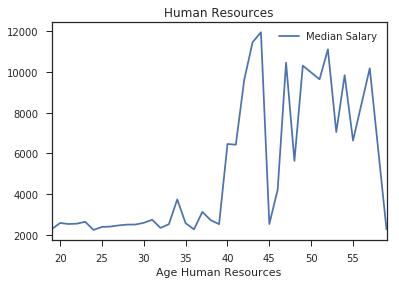

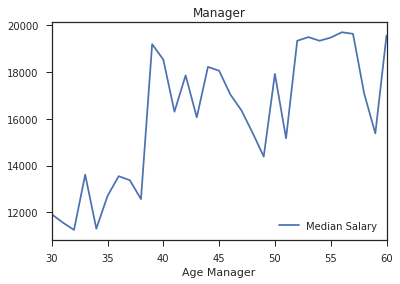

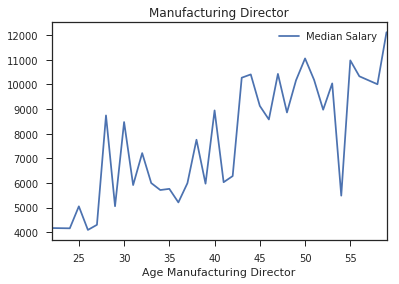

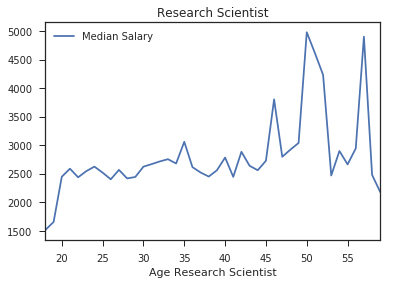

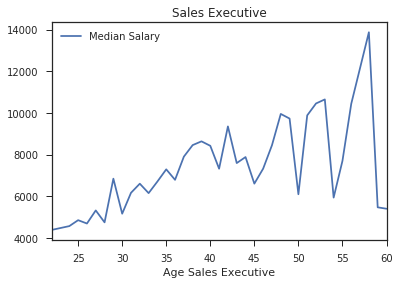

In [63]:
%matplotlib inline
# Employee Salaries by Job Roles
def salary_by_jobrole(df):
    for job in set(df.JobRole):
        agesalary = []
        for i in range(df['Age'].min(), df['Age'].max() + 1):
            agesalary.append([i, df[(df['Age'] == i) & (df['JobRole'] == job)]['MonthlyIncome'].median()])
        agesalary = pd.DataFrame(agesalary, columns=['Age '+job, 'Median Salary'])
        agesalary = agesalary.dropna().reset_index(drop=True)
    
        agesalary.plot(x='Age '+job, y='Median Salary', title=job)

salary_by_jobrole(ibm_data)

# Pairwise plots for IBM HR

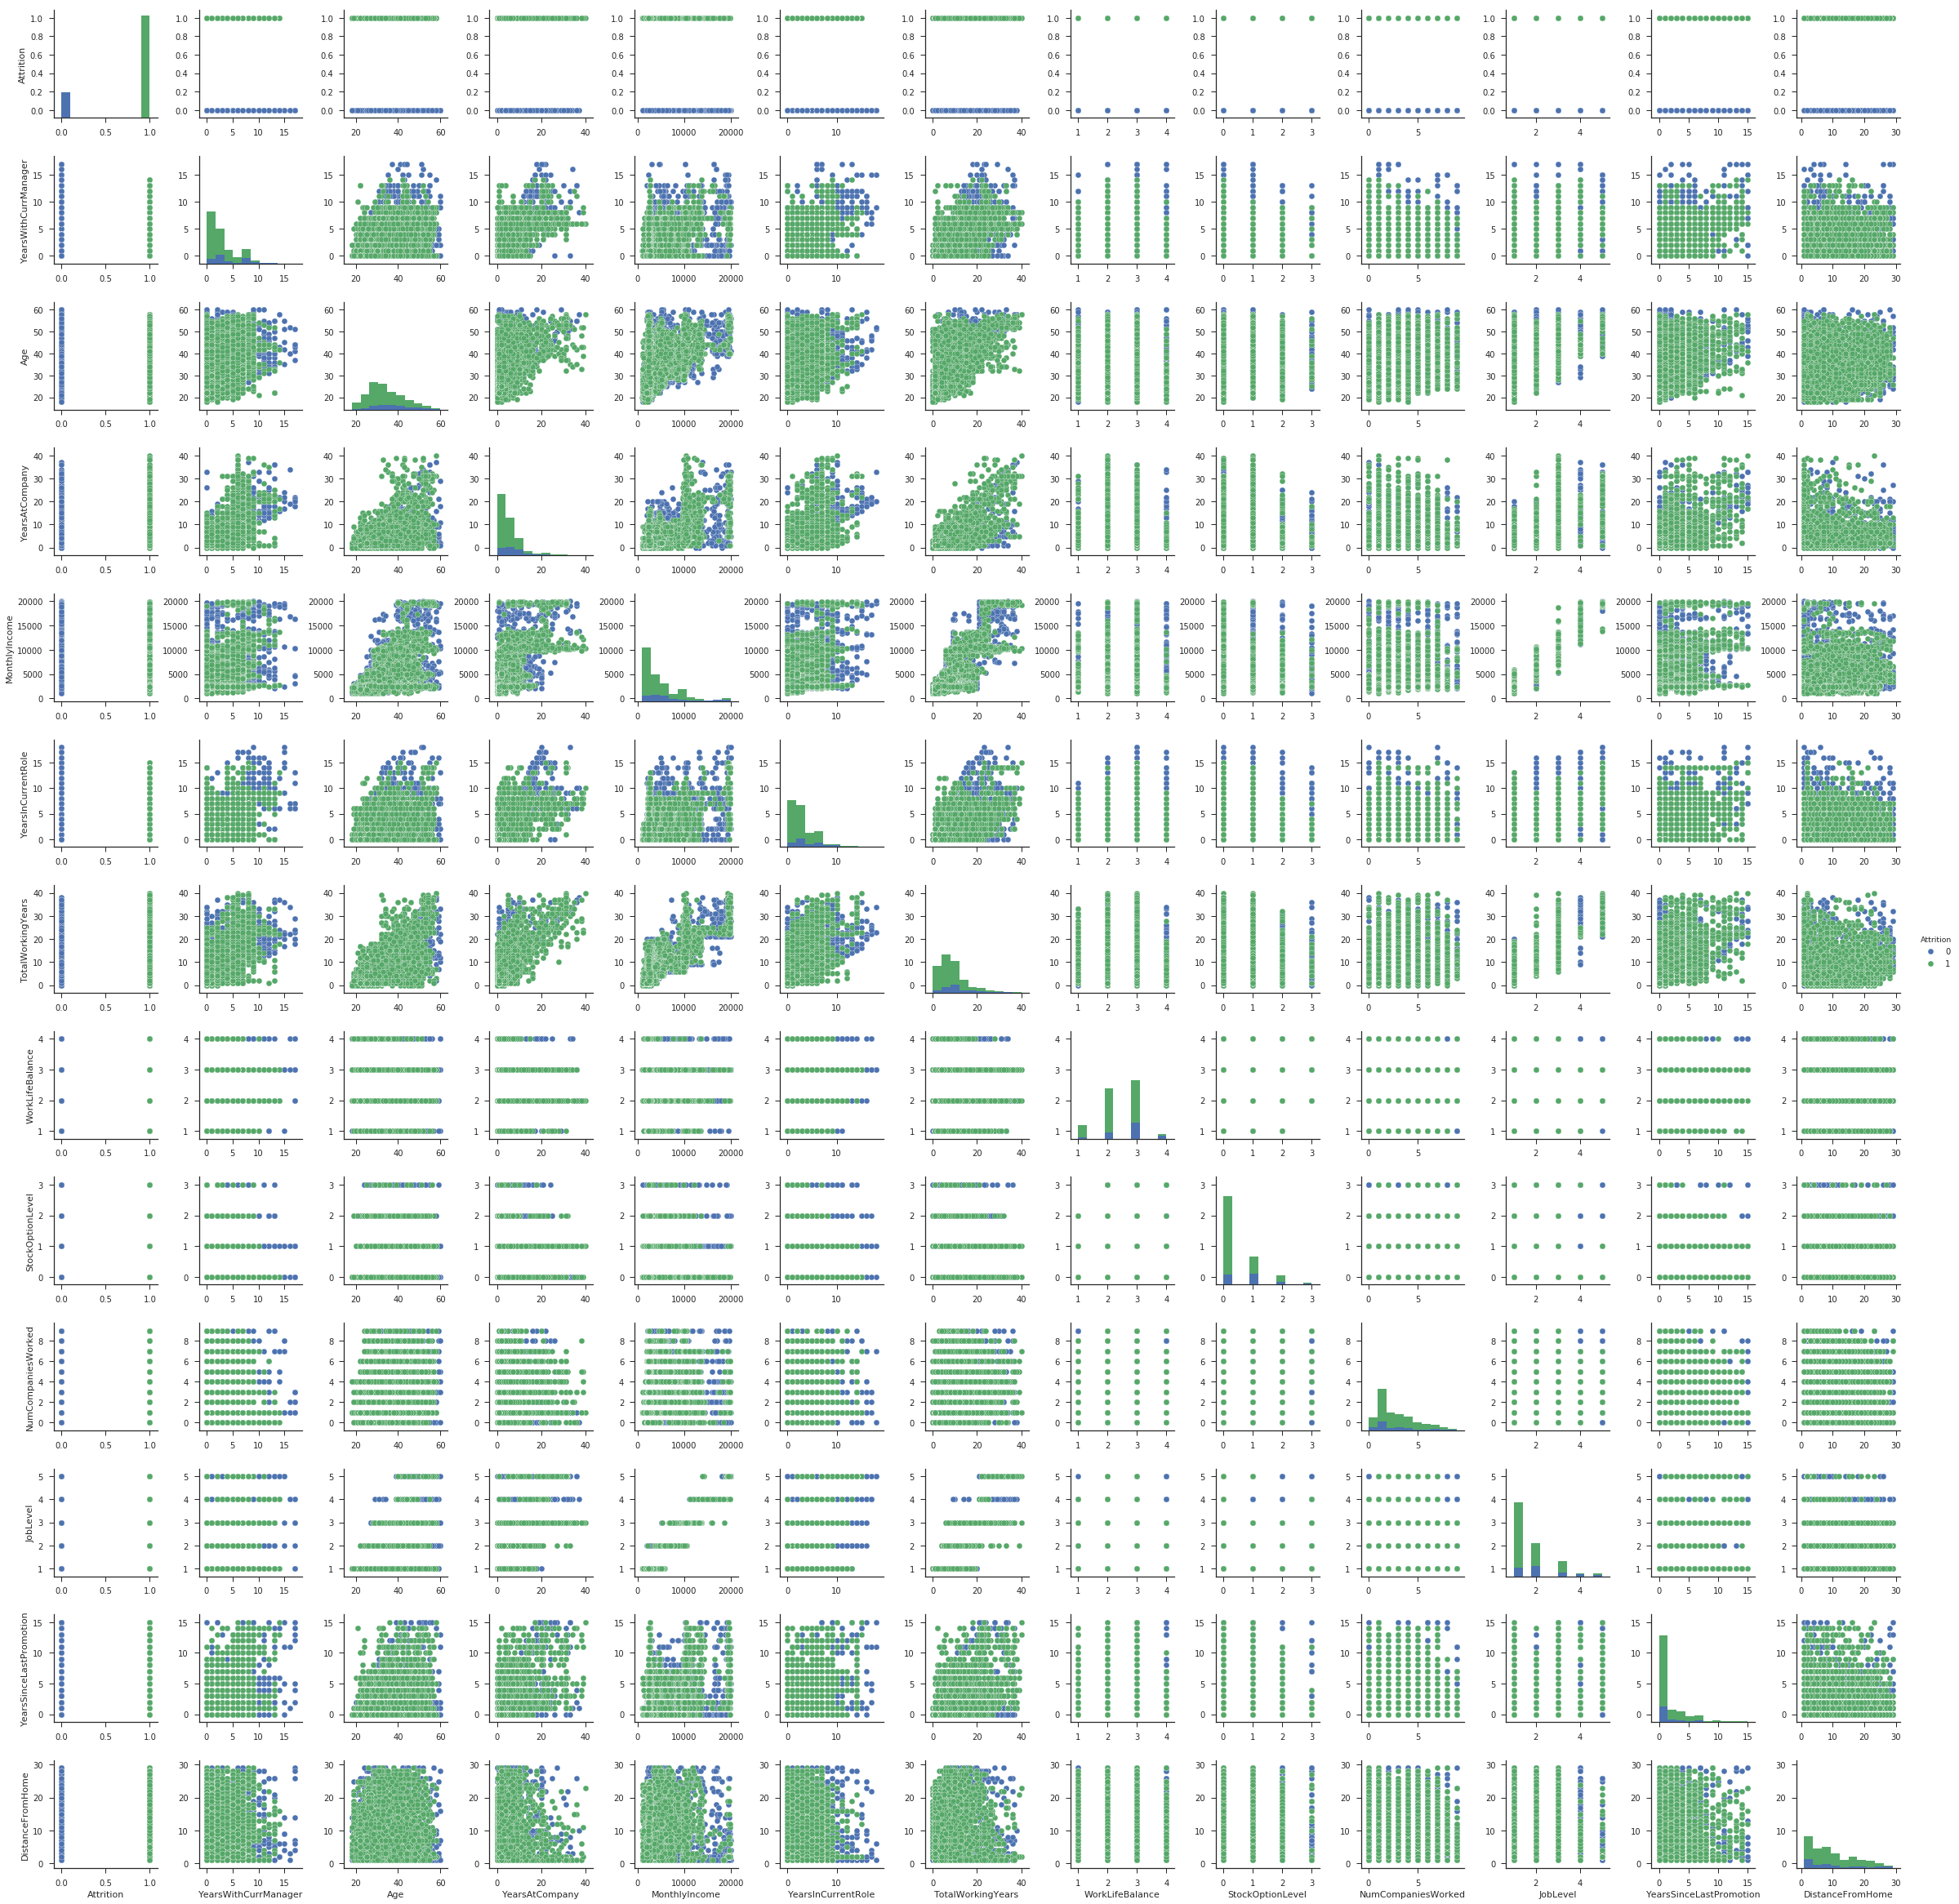

In [4]:
# Pairwise plots
ibm_df.Attrition  = pd.Categorical(ibm_df.Attrition).codes
ibm_df.MaritalStatus = pd.Categorical(ibm_df.MaritalStatus).codes

# Out of 35 columns these have some relations (Mentioned in ibm_analysis.txt)

columns_to_plot = ['Attrition', 'YearsWithCurrManager', 'Age', 'YearsAtCompany', 'MonthlyIncome', 
                   'YearsInCurrentRole', 'TotalWorkingYears', 'WorkLifeBalance', 'StockOptionLevel',
                  'NumCompaniesWorked', 'JobLevel', 'YearsSinceLastPromotion', 'DistanceFromHome']


g = sns.pairplot(ibm_df[columns_to_plot], hue='Attrition')
plt.show()

# Pairwise plots for XYZ HR

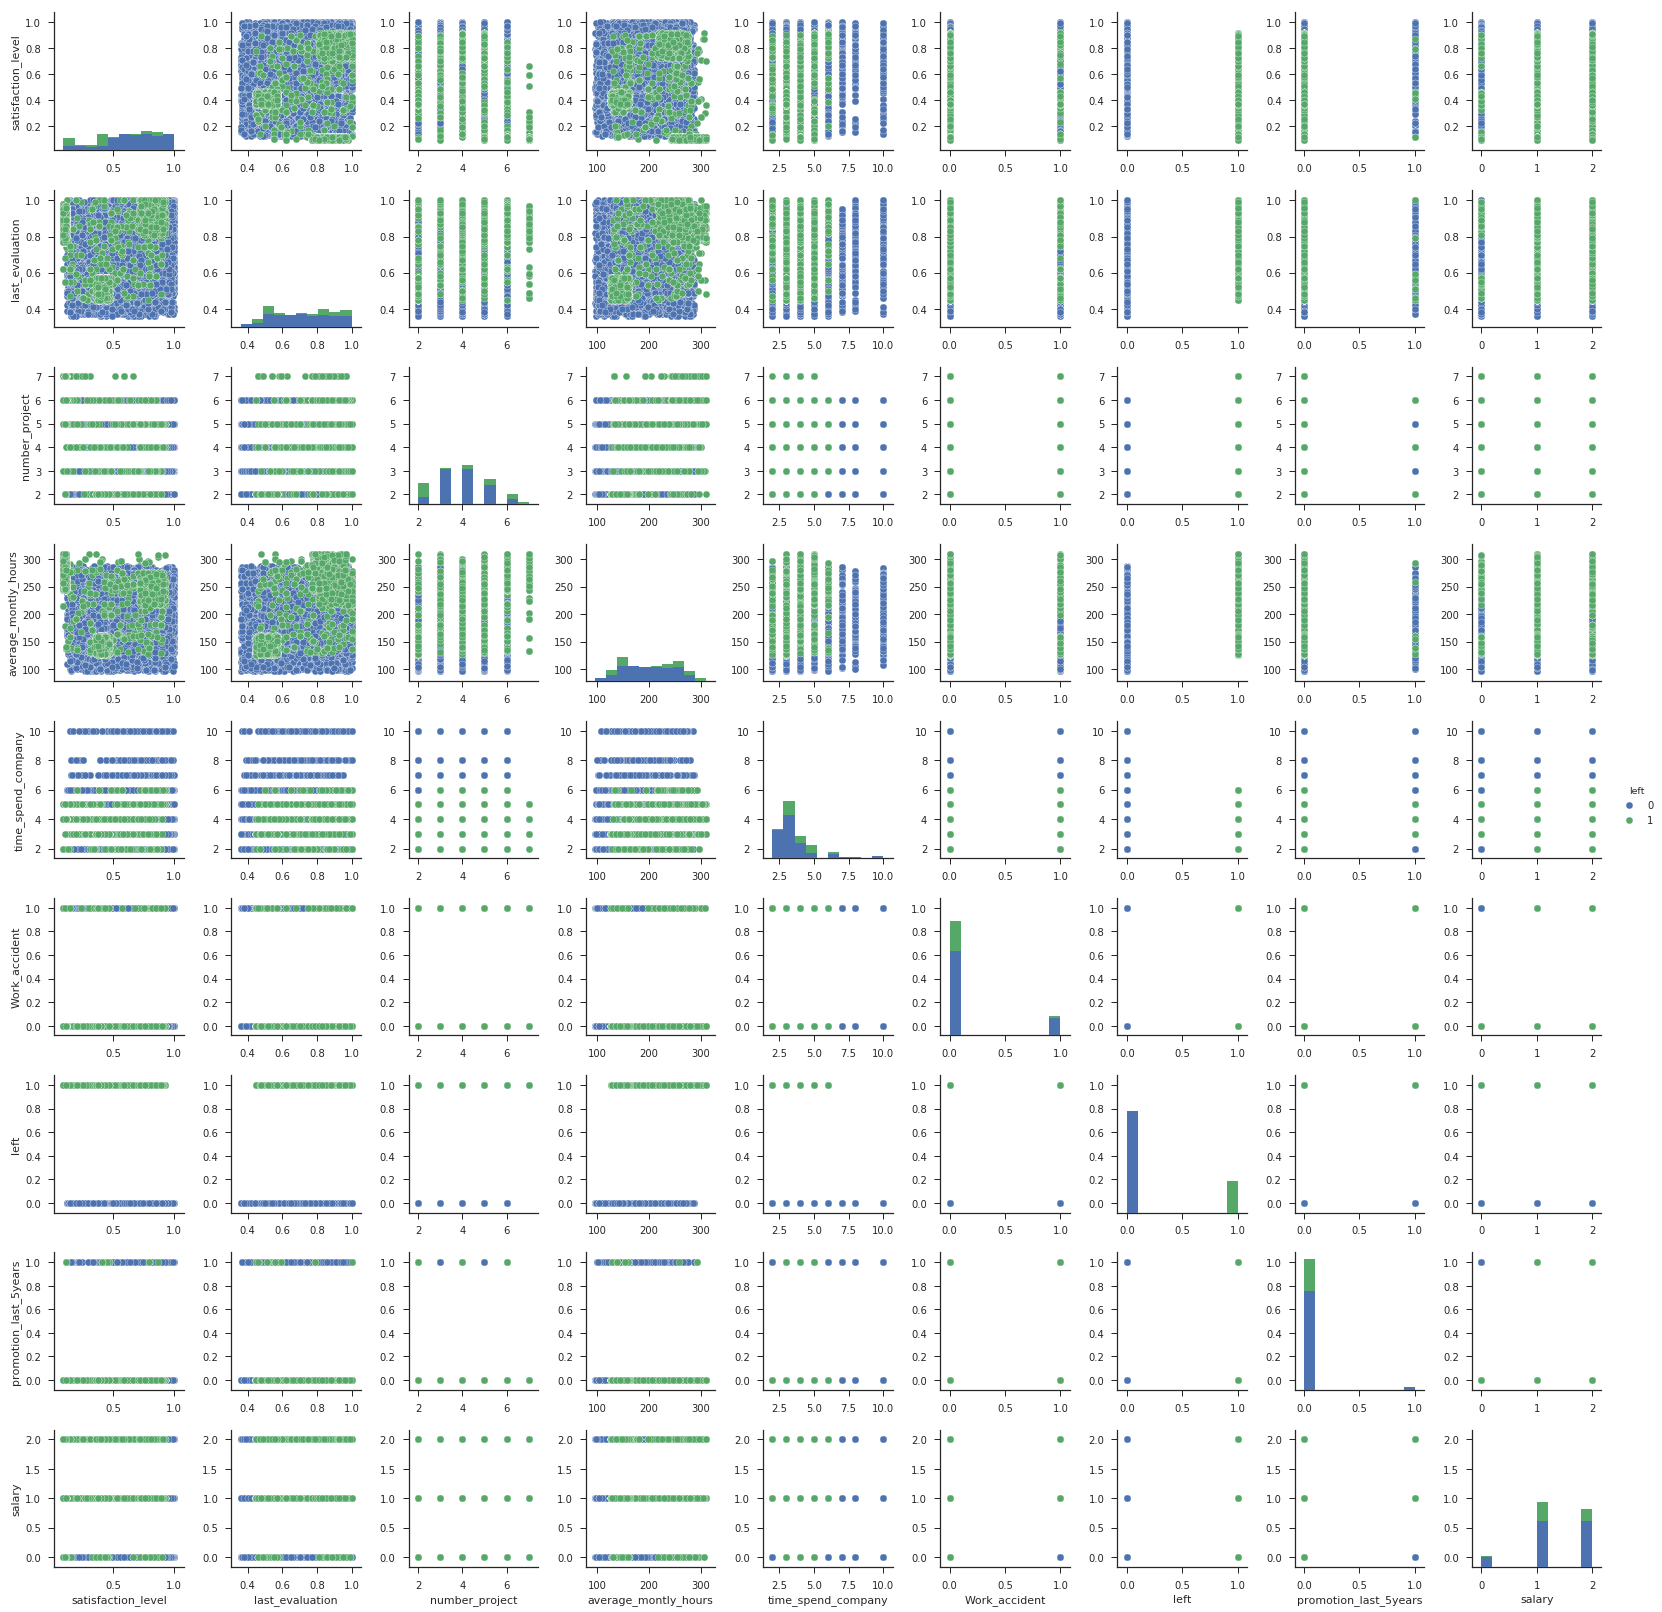

In [5]:
xyz_df = copy.deepcopy(xyz_data)
xyz_df.salary  = pd.Categorical(xyz_df.salary).codes
g = sns.pairplot(xyz_df, hue='left')
plt.show()

# Employee Turnovers

In [9]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = xyz_df.groupby('left')
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.345842


In [10]:
turnover_Summary2 = ibm_df.groupby('Attrition')
turnover_Summary2.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,1.045418,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.471569,743.671288,10.140848,2.526020,2.131404,64.189070,2.207555,1.521800,2.112518,1.332530,...,3.033153,2.250352,0.295961,8.011855,2.302994,2.330319,4.646373,2.497087,1.579867,2.457304


# Correlation Matrix XYZ

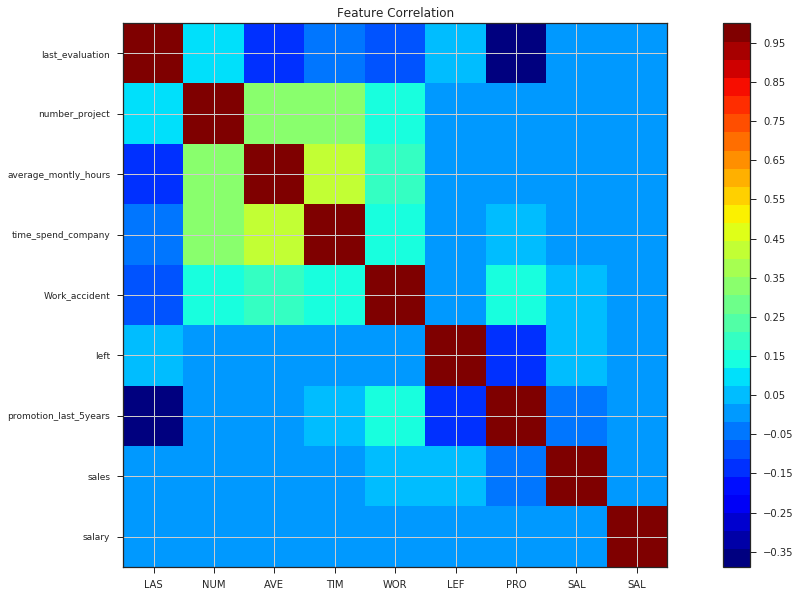

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def correlation_matrix(df):
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=df.columns
    xlabels = [x[0:3].upper() for x in labels]
    ax1.set_xticklabels(xlabels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=np.arange(-0.75,1,0.1))
    plt.show()

correlation_matrix(xyz_df)

# Correlation Matrix IBM

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.191945,0.008597,-0.000668,0.170907,0.035348,0.094593,0.076234,0.572351,0.050180,...,0.026935,0.128931,0.136957,0.626105,0.012969,0.049925,0.426981,0.350705,0.324866,0.344094
Attrition,-0.191945,1.000000,-0.077640,0.067412,-0.172898,-0.258563,-0.040705,-0.310319,-0.268899,-0.266261,...,-0.206691,-0.195686,-0.320748,-0.219228,-0.195509,-0.246912,-0.196195,-0.271778,-0.097062,-0.259962
DailyRate,0.008597,-0.077640,1.000000,0.026956,0.008480,-0.009628,0.064792,0.064648,0.017715,0.030680,...,-0.005866,-0.011988,0.034494,0.021114,-0.034617,0.029944,-0.032116,0.008566,-0.027580,0.019252
DistanceFromHome,-0.000668,0.067412,0.026956,1.000000,-0.007486,-0.049376,-0.014104,0.026921,0.024219,-0.030300,...,0.012861,-0.062151,0.022979,-0.037225,-0.102389,-0.087514,-0.040669,-0.021292,-0.033916,-0.029720
Education,0.170907,-0.172898,0.008480,-0.007486,1.000000,-0.011468,0.056477,0.116425,0.168311,0.078915,...,-0.004801,0.025825,0.097313,0.165394,-0.009866,0.041619,0.107781,0.095879,0.070294,0.111627
EnvironmentSatisfaction,0.035348,-0.258563,-0.009628,-0.049376,-0.011468,1.000000,-0.023765,0.149334,0.011908,0.085024,...,0.078450,0.076946,0.025553,0.012471,0.089432,0.078676,0.036389,0.054413,0.061472,0.061124
HourlyRate,0.094593,-0.040705,0.064792,-0.014104,0.056477,-0.023765,1.000000,0.066984,0.022003,-0.052445,...,0.037751,0.047903,0.056252,0.031352,0.015293,0.032529,0.032077,0.025307,-0.004506,0.011559
JobInvolvement,0.076234,-0.310319,0.064648,0.026921,0.116425,0.149334,0.066984,1.000000,0.072701,0.035597,...,0.073866,0.070003,0.139754,0.040084,0.040650,0.130657,0.036552,0.061337,0.022371,0.114122
JobLevel,0.572351,-0.268899,0.017715,0.024219,0.168311,0.011908,0.022003,0.072701,1.000000,0.062822,...,0.049062,0.128420,0.129352,0.797354,-0.030709,0.110477,0.611750,0.538810,0.432995,0.470947
JobSatisfaction,0.050180,-0.266261,0.030680,-0.030300,0.078915,0.085024,-0.052445,0.035597,0.062822,1.000000,...,0.006509,0.114331,0.080434,0.057012,0.080220,0.013717,0.057625,0.029419,0.051055,0.017752


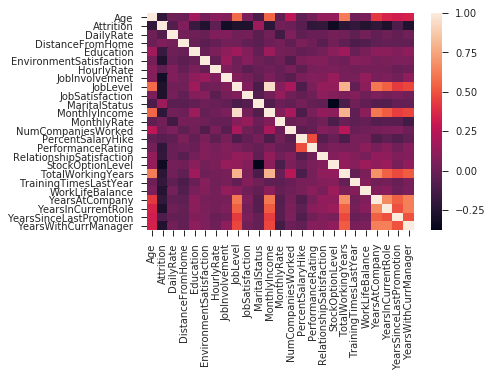

In [30]:
corr = ibm_df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

## Summary:

 From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

 For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.


## Salary vs TurnOver
### XYZ HR

Text(0.5,1,u'Employee Salary Turnover Distribution')

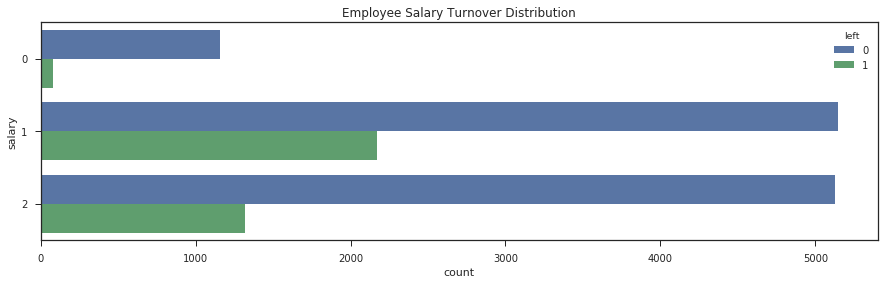

In [31]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=xyz_df).set_title('Employee Salary Turnover Distribution')

### IBM HR


Text(0.5,1,u'Employee Salary Turnover Distribution for IBM')

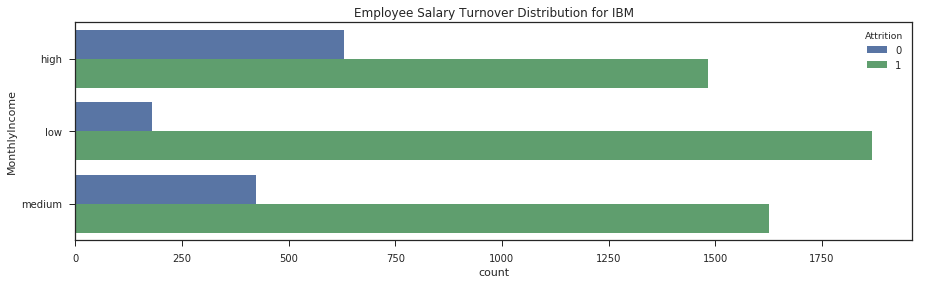

In [32]:
import numpy as np

ibm_cpy = copy.deepcopy(ibm_df)
low_sal = ibm_cpy['MonthlyIncome']

a = np.array(ibm_cpy['MonthlyIncome'])
low_range = np.percentile(a, 33) 
medium_range = np.percentile(a, 66)


def cat_to_sal(sal):
    if sal <= low_range:
        return 'low'
    elif sal >= low_range and sal < medium_range:
        return 'medium'
    elif sal >= medium_range:
        return 'high'
    
incomes = [cat_to_sal(x) for x in ibm_cpy['MonthlyIncome'].values]
ibm_cpy["MonthlyIncome"] = incomes


f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="MonthlyIncome", hue='Attrition', data=ibm_cpy).set_title('Employee Salary Turnover Distribution for IBM')


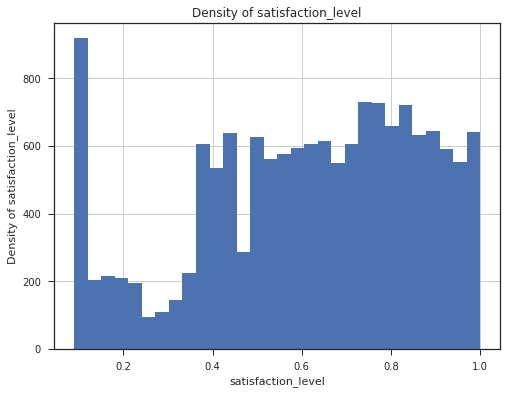

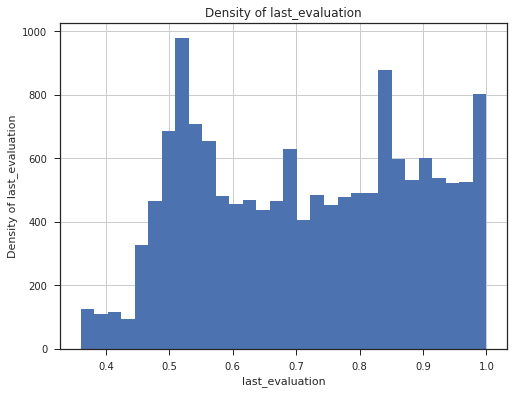

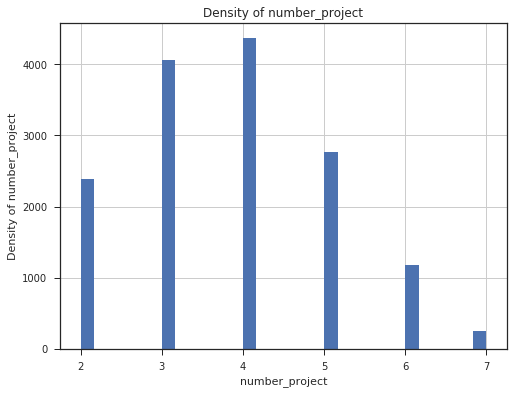

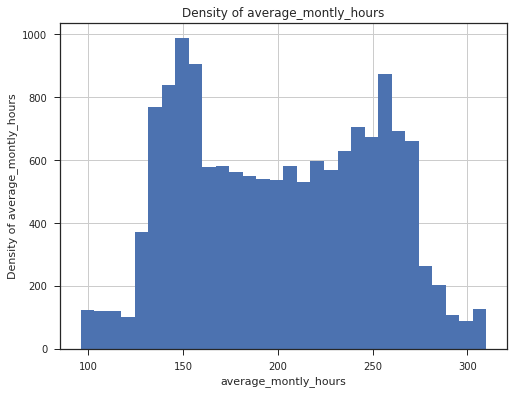

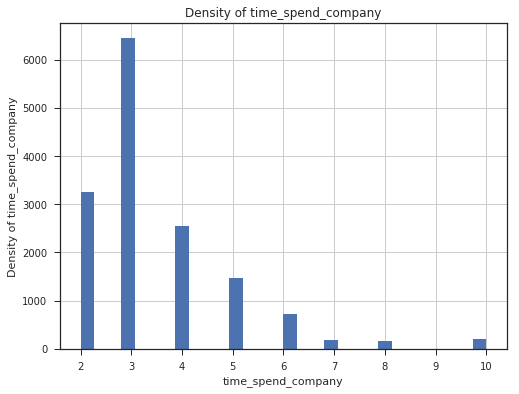

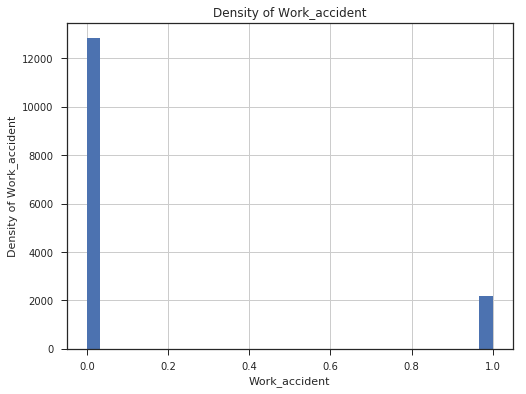

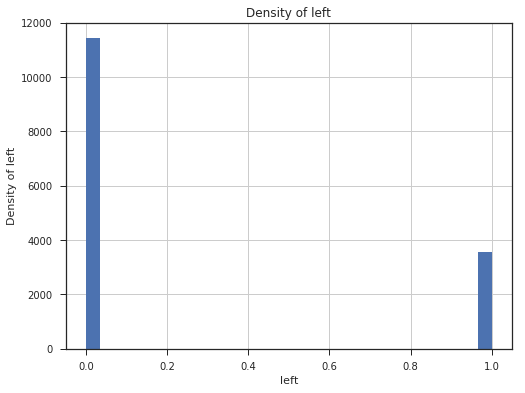

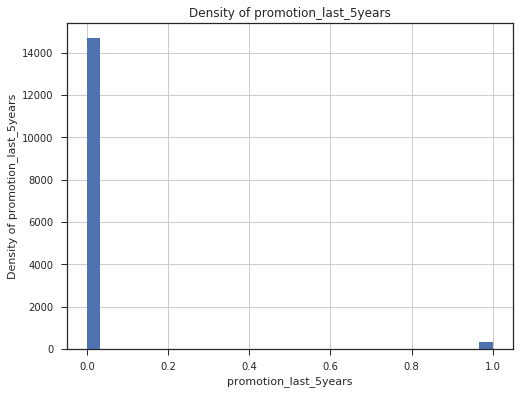

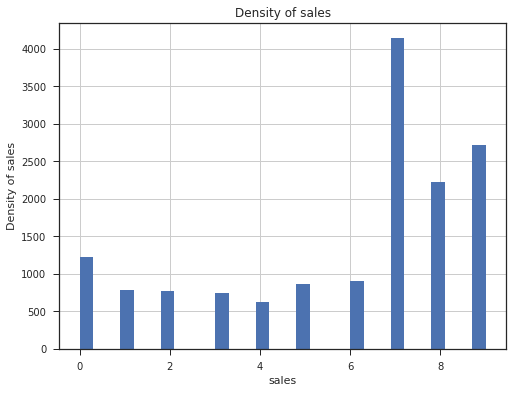

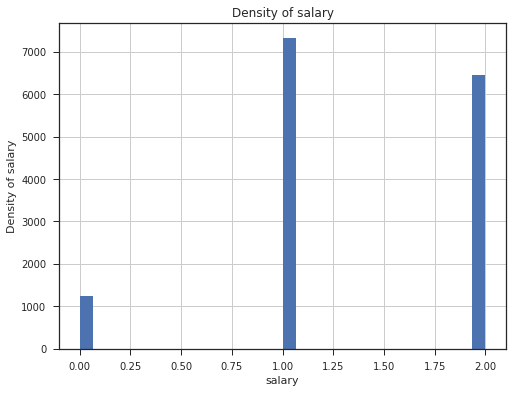

In [60]:
xyz_hist_cols = xyz_df.columns
def hr_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
xyz_df.sales  = pd.Categorical(xyz_df.sales).codes
    
hr_hist(xyz_df, xyz_hist_cols)